# **Detecția bolii unei frunze**

Implementarea unei aplicații software pentru boala frunzelor detecție bazată pe segmentarea culorii, în urma soluției introduse de Sharad Hasan.Codul va fi scris în Python. Imaginile vor fi descompuse după segmentare în partea sănătoasă a frunzei,parte bolnavă a frunzei și a fundalului. Apoi este creata o histograma pentru pixelii segmentati.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Citirea imaginii RGB
image_rgb = cv2.imread('/content/drive/MyDrive/Proiect PNI/frunza.jpg')
#image_rgb = cv2.imread('8.JPG')

# Convertirea imaginii în spațiul de culoare LAB
image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2LAB)

# Extrage canalele L, a și b
channel_l, channel_a, channel_b = cv2.split(image_lab)


Afișarea imaginii originale, a celei convertite și a canalelor L, a și b

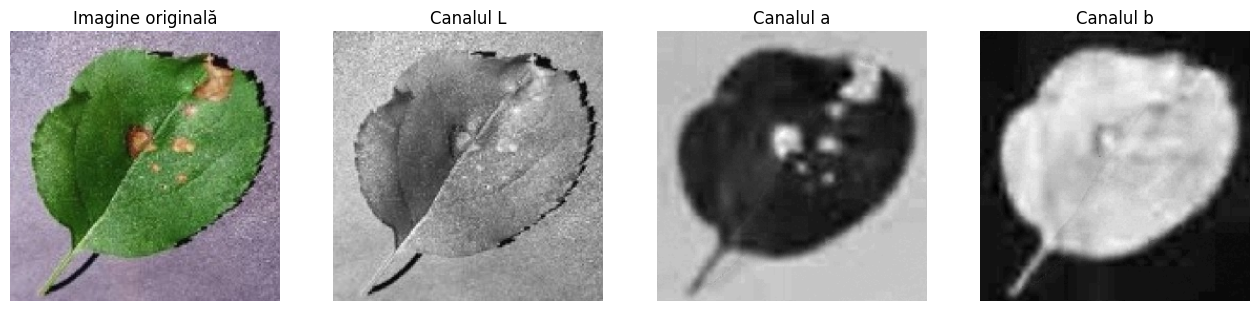

In [4]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imagine originală')
plt.axis('off')


plt.subplot(1, 4, 2)
plt.imshow(channel_l, cmap='gray')
plt.title('Canalul L')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(channel_a, cmap='gray')
plt.title('Canalul a')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(channel_b, cmap='gray')
plt.title('Canalul b')
plt.axis('off')
plt.show()


 În următoarea secvență de cod, calculăm histogramele pentru fiecare canal L, a* și b*.
 L reprezintă canalul de iluminanța,  
 a reprezintă culoarea pe axa roșie-verde,
 b reprezintă culoarea pe axa galben-albastru

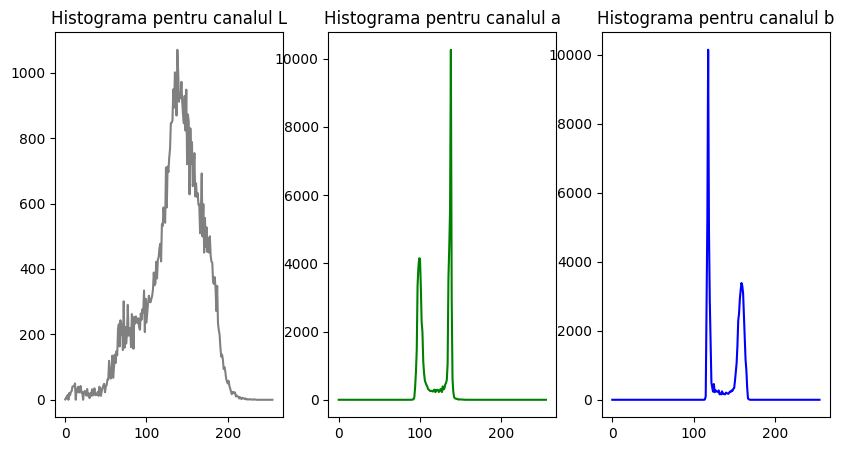

In [5]:
# Calculează histogramele pentru fiecare canal
hist_l = cv2.calcHist([channel_l], [0], None, [256], [0, 256])
hist_a = cv2.calcHist([channel_a], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([channel_b], [0], None, [256], [0, 256])

# Afișează histogramele
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(hist_l, color='gray')
plt.title('Histograma pentru canalul L')

plt.subplot(1, 3, 2)
plt.plot(hist_a, color='g')
plt.title('Histograma pentru canalul a')

plt.subplot(1, 3, 3)
plt.plot(hist_b, color='b')
plt.title('Histograma pentru canalul b')

plt.show()




---



În următoarea parte a programului , o să începem segmentarea pe zone a imaginii(fundal, pete bolnave, zona sanatoasa)


### **spațiul LAB**

## zona sănătoasă

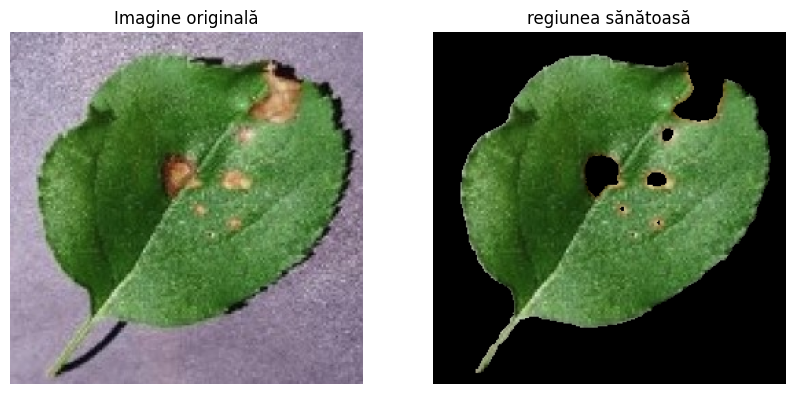

In [6]:
# Definirea pragurilor pentru componenta a
a_lower, a_upper = 70, 125


# Crearea măștii folosind componentele a și b
mask= cv2.inRange(image_lab, (0, a_lower, 140), (255, a_upper, 255))


# Aplicarea măștii pe imagine
result_LABs = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Afișarea imaginii și a rezultatului
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imagine originală')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_LABs, cv2.COLOR_BGR2RGB))
plt.title('regiunea sănătoasă')

plt.axis('off')
plt.show()

## Zona bolnavă

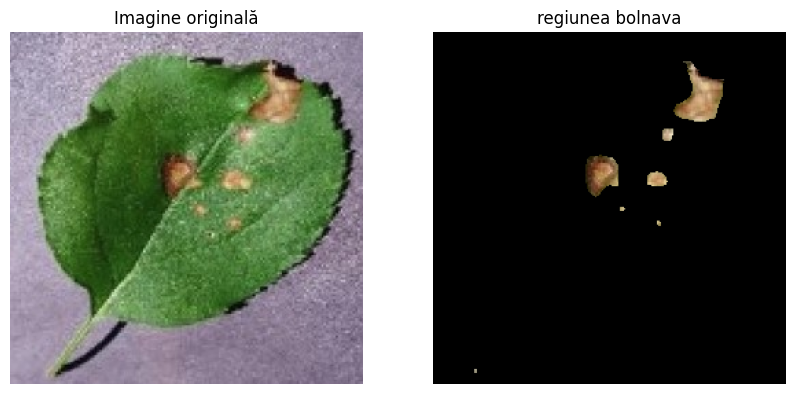

In [7]:
# Definirea pragurilor pentru componentele a și b
a_lower, a_upper = 125, 160 # Puteți ajusta aceste valori în funcție de necesități
b_lower, b_upper = 140,190  # Puteți ajusta aceste valori în funcție de necesități

# Crearea măștii folosind componentele de culoare a și b
mask = cv2.inRange(image_lab, (0, a_lower, b_lower), (255, a_upper,  b_upper))

# Aplicarea măștii pe imagine
result_LABb = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Afișarea imaginii și a rezultatului
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imagine originală')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_LABb, cv2.COLOR_BGR2RGB))
plt.title('regiunea bolnava')
plt.axis('off')

plt.show()


## regiunea de fundal

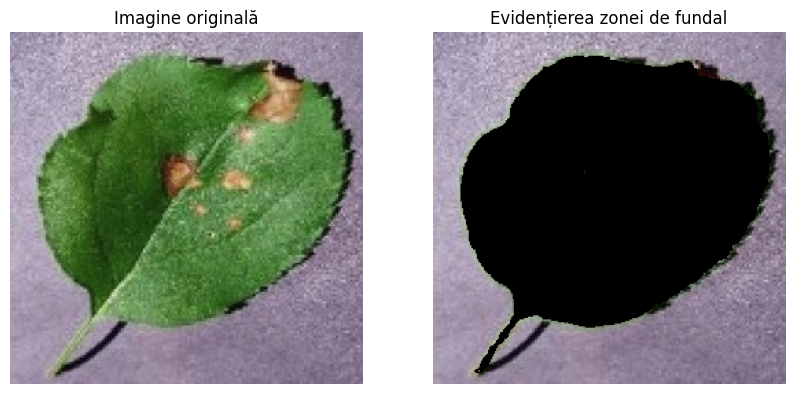

In [8]:
# Definirea pragurilor pentru componentele a și b
a_lower, a_upper = 100, 160 # Puteți ajusta aceste valori în funcție de necesități
b_lower, b_upper =90,140 # Puteți ajusta aceste valori în funcție de necesități

# Crearea măștii folosind componentele de culoare a și b
mask = cv2.inRange(image_lab, (0, a_lower, b_lower), (255, a_upper,  b_upper))



# Aplicarea măștii pe imagine
result_LABf = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Afișarea imaginii și a rezultatului
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imagine originală')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_LABf, cv2.COLOR_BGR2RGB))
plt.title('Evidențierea zonei de fundal')
plt.axis('off')

plt.show()


Afisarea imaginilor modificate in spațiul LAB

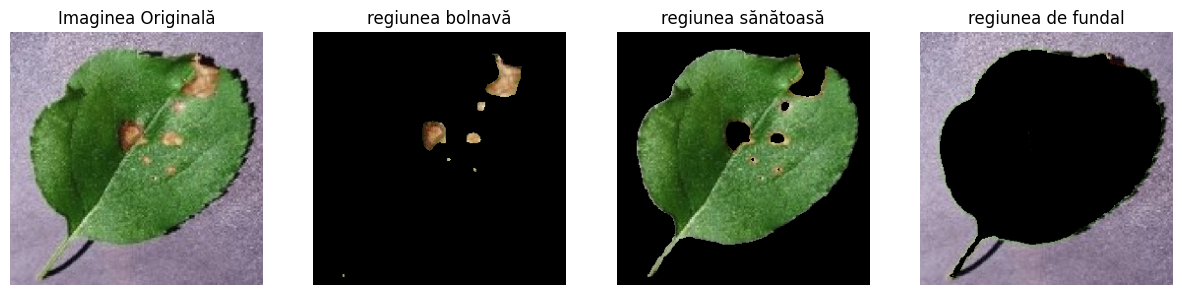

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imaginea Originală')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(result_LABb, cv2.COLOR_BGR2RGB))
plt.title('regiunea bolnavă')
plt.axis('off')

plt.subplot(1, 4 , 3)
plt.imshow(cv2.cvtColor(result_LABs, cv2.COLOR_BGR2RGB))
plt.title('regiunea sănătoasă')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(result_LABf, cv2.COLOR_BGR2RGB))
plt.title('regiunea de fundal')
plt.axis('off')
plt.show()

## Scatter pentru imaginile din spațiul LAB

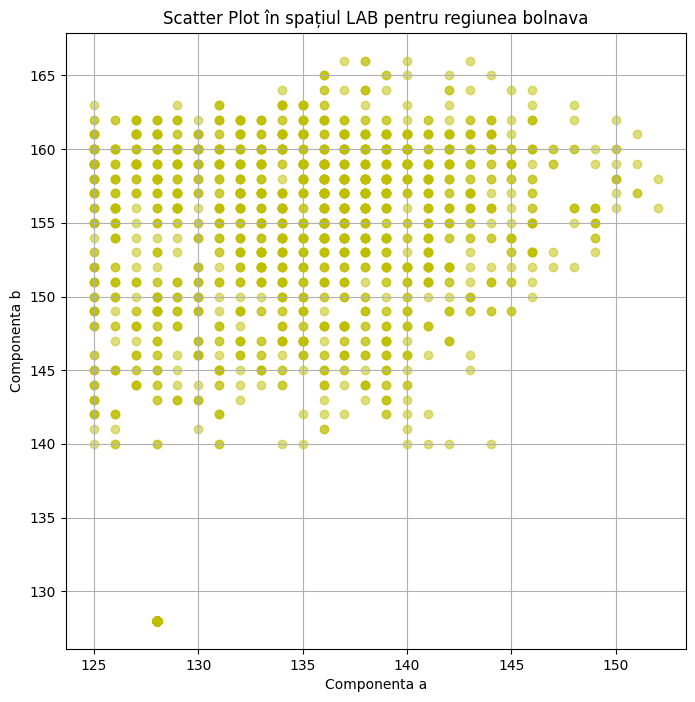

In [10]:
# Converteste imaginea in spatiul de culoare LAB
lab_image_disease = cv2.cvtColor(result_LABb, cv2.COLOR_BGR2LAB)

# Extrage valorile pentru a și b
a_values = lab_image_disease[:, :, 1].ravel()  # Componenta a
b_values = lab_image_disease[:, :, 2].ravel()  # Componenta b

# Crearea scatter plot-ului
plt.figure(figsize=(8, 8))
plt.scatter( a_values, b_values, c='y', marker='o', alpha=0.5)
plt.title('Scatter Plot în spațiul LAB pentru regiunea bolnava')
plt.xlabel('Componenta a')
plt.ylabel('Componenta b')
plt.grid(True)
plt.show()

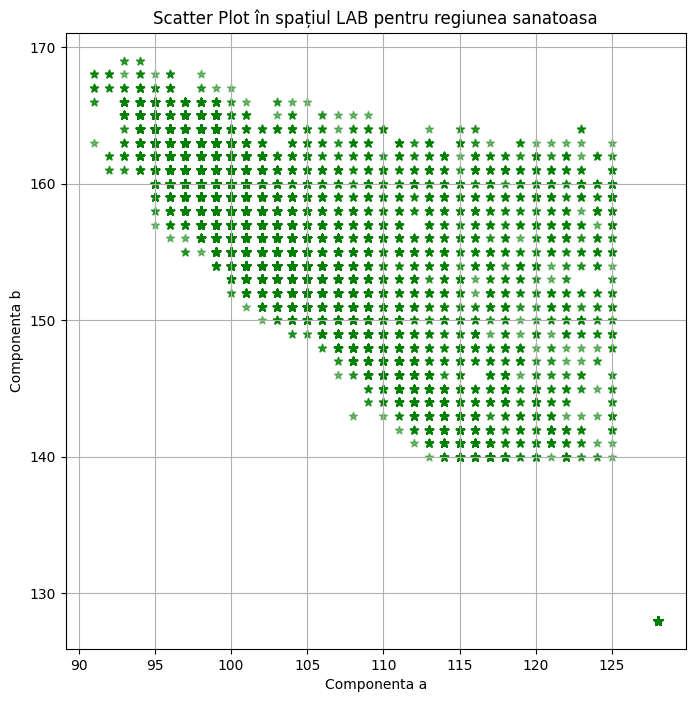

In [11]:
# Converteste imaginea in spatiul de culoare LAB
lab_image_result = cv2.cvtColor(result_LABs, cv2.COLOR_BGR2LAB)

# Extrage valorile pentru a și b

a_values1 = lab_image_result[:, :, 1].ravel()  # Componenta a
b_values1 = lab_image_result[:, :, 2].ravel()  # Componenta b

# Crearea scatter plot-ului
plt.figure(figsize=(8, 8))

plt.scatter( a_values1, b_values1, c='g', marker='*', alpha=0.5)
plt.title('Scatter Plot în spațiul LAB pentru regiunea sanatoasa')
plt.xlabel('Componenta a')
plt.ylabel('Componenta b')
plt.grid(True)
plt.show()

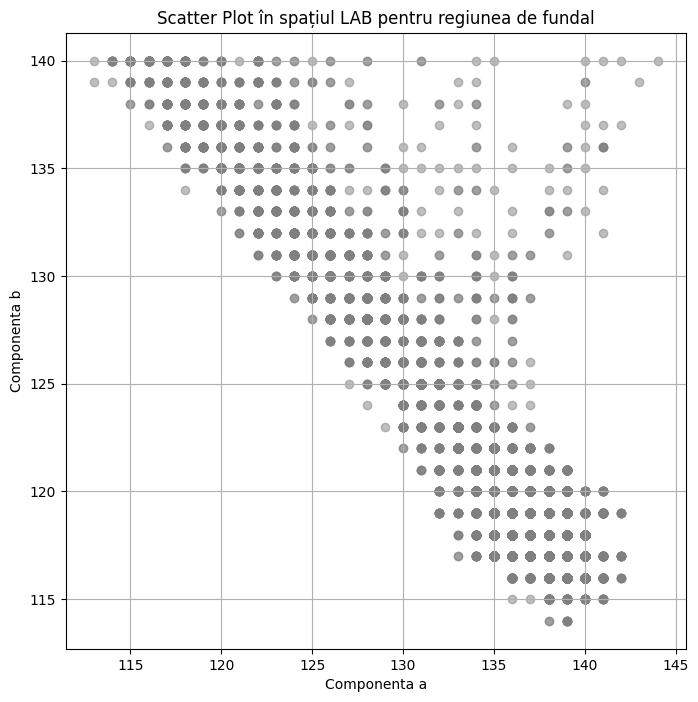

In [12]:
# Converteste imaginea in spatiul de culoare LAB
lab_image_result1 = cv2.cvtColor(result_LABf, cv2.COLOR_BGR2LAB)

# Extrage valorile pentru L, a și b

a_values2 = lab_image_result1[:, :, 1].ravel()  # Componenta a
b_values2 = lab_image_result1[:, :, 2].ravel()  # Componenta b

# Crearea scatter plot-ului
plt.figure(figsize=(8, 8))
plt.scatter(a_values2, b_values2, c='gray', marker='o', alpha=0.5)
plt.title('Scatter Plot în spațiul LAB pentru regiunea de fundal')
plt.xlabel('Componenta a')
plt.ylabel('Componenta b')
plt.grid(True)
plt.show()

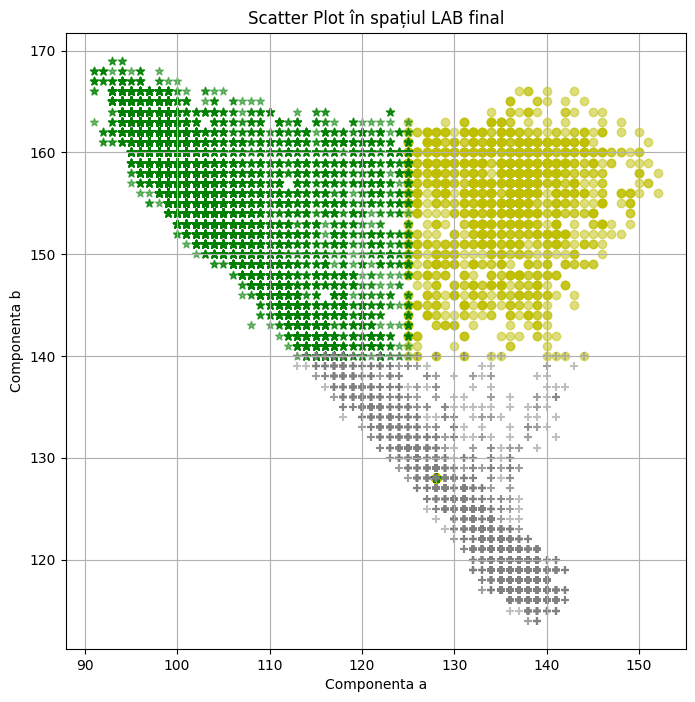

In [13]:
# Crearea scatter plot-ului
plt.figure(figsize=(8, 8))
plt.scatter(a_values, b_values, c='y', marker='o', alpha=0.5)
plt.scatter(a_values1, b_values1, c='g', marker='*', alpha=0.5)
plt.scatter(a_values2, b_values2, c='gray', marker='+', alpha=0.5)
plt.title('Scatter Plot în spațiul LAB final')
plt.xlabel('Componenta a')
plt.ylabel('Componenta b')
plt.grid(True)
plt.show()

Afisare rezultate finale din spatiul LAB

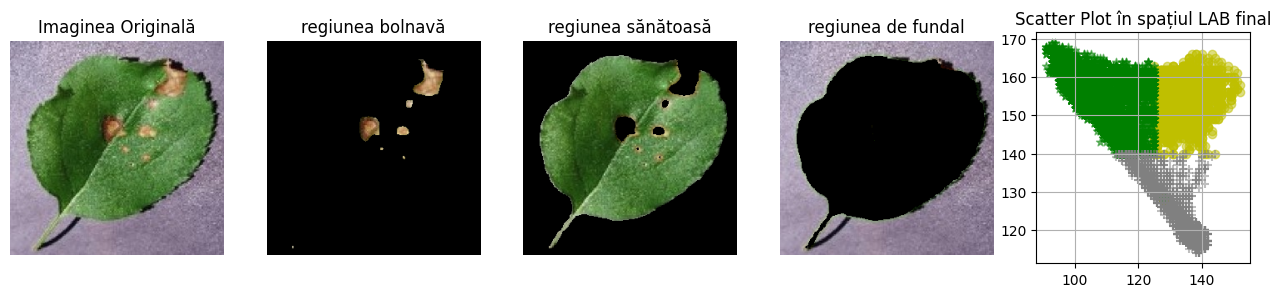

In [14]:
plt.figure(figsize=(16, 3))
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imaginea Originală')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(result_LABb, cv2.COLOR_BGR2RGB))
plt.title('regiunea bolnavă')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(result_LABs, cv2.COLOR_BGR2RGB))
plt.title('regiunea sănătoasă')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(result_LABf, cv2.COLOR_BGR2RGB))
plt.title('regiunea de fundal')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.scatter(a_values, b_values, c='y', marker='o', alpha=0.5)
plt.scatter(a_values1, b_values1, c='g', marker='*', alpha=0.5)
plt.scatter(a_values2, b_values2, c='gray', marker='+', alpha=0.5)
plt.title('Scatter Plot în spațiul LAB final')
plt.grid(True)
plt.show()


### **spațiul HSV**

Imaginea originală(rgb) convertită în HSV

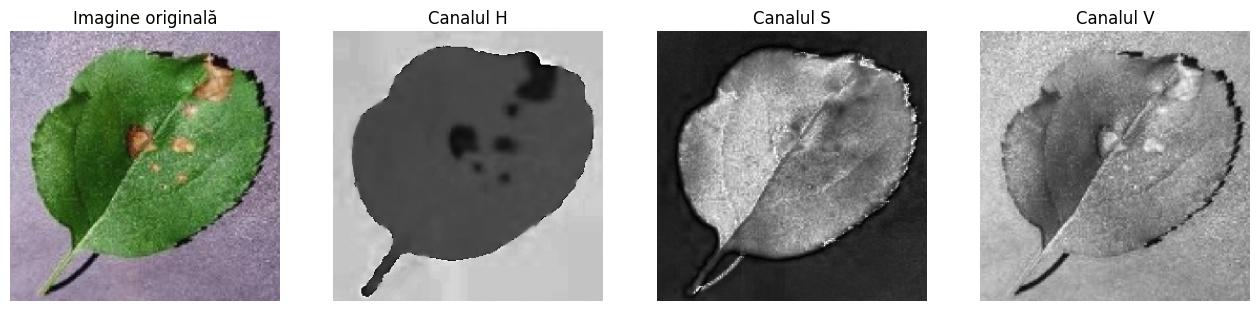

In [15]:
#convertim imaginea din rgb in hsv
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)
#extragem canalele H S si V

channel_h, channel_s, channel_v = cv2.split(image_hsv)

plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imagine originală')
plt.axis('off')

#plt.subplot(1, 5, 2)
#plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_BGR2HSV))
#plt.title('Imagine în spațiul HSV')
#plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(channel_h, cmap='gray')
plt.title('Canalul H')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(channel_s, cmap='gray')
plt.title('Canalul S')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(channel_v, cmap='gray')
plt.title('Canalul V')
plt.axis('off')
plt.show()

În următoarea secvență de cod, calculăm histogramele pentru fiecare canal H S V.


---


H reprezintă canalul de nuanța(hue),

S reprezintă canalul de saturație,

V reprezinta valoarea. Sau altfel spus luminanța sau intensitatea imaginii.

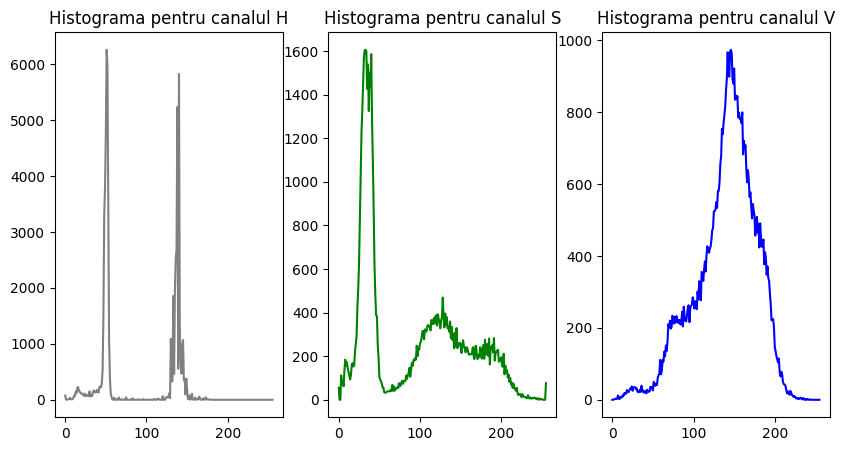

In [16]:
# Calculează histogramele pentru fiecare canal
hist_h = cv2.calcHist([channel_h], [0], None, [256], [0, 256])
hist_s = cv2.calcHist([channel_s], [0], None, [256], [0, 256])
hist_v = cv2.calcHist([channel_v], [0], None, [256], [0, 256])

# Afișează histogramele
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(hist_h, color='gray')
plt.title('Histograma pentru canalul H')

plt.subplot(1, 3, 2)
plt.plot(hist_s, color='g')
plt.title('Histograma pentru canalul S')

plt.subplot(1, 3, 3)
plt.plot(hist_v, color='b')
plt.title('Histograma pentru canalul V')

plt.show()


În următoarea parte a programului , o să începem segmentarea pe zone a imaginii(fundal, pete bolnave, zona sanatoasa)

## zona sănătoasă

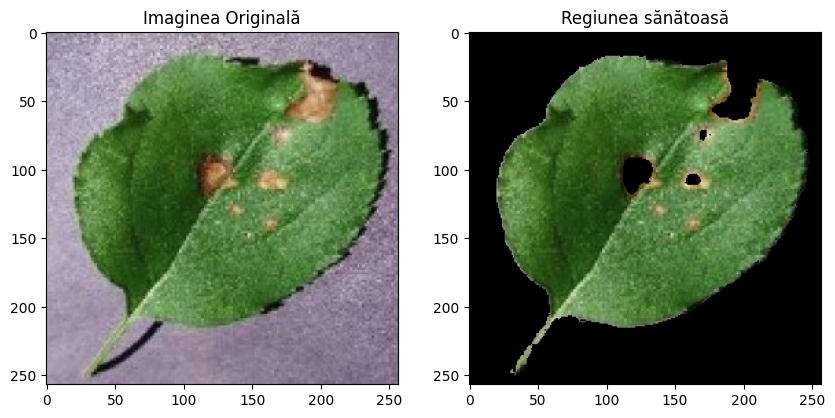

In [17]:


hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)

# Defineste limitele culorilor pentru o boală specifică (acestea pot varia)
lower_bound = np.array([20, 45, 0])  # Exemplu de valori HSV pentru culoarea inferioară
upper_bound = np.array([60, 255, 255])  # Exemplu de valori HSV pentru culoarea superioară

# Creează o mască binară folosind limitele culorilor
mask = cv2.inRange(hsv, lower_bound, upper_bound)

# Identifică regiunile conectate (componente conectate)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

# Inițializează o mască goală pentru a adăuga regiunile bolnave
disease_mask = np.zeros_like(mask)

# Parcurge regiunile și le adaugă la mască
for i in range(1, num_labels):  # începe de la 1 pentru a exclude fundalul
    area = stats[i, cv2.CC_STAT_AREA]
    # Ajustează acest prag pentru a exclude regiunile mici, care ar putea fi zgomot
    if area > 1000:
        region_mask = np.where(labels == i, 255, 0).astype(np.uint8)
        disease_mask = cv2.bitwise_or(disease_mask, region_mask)

# Aplică mască pe imaginea originală pentru a evidenția zona sănătoasă
result2 = cv2.bitwise_and(image_rgb, image_rgb, mask=disease_mask)

# Afișează imaginea originală și rezultatul
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imaginea Originală')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('Regiunea sănătoasă')

plt.show()


## zona bolnavă

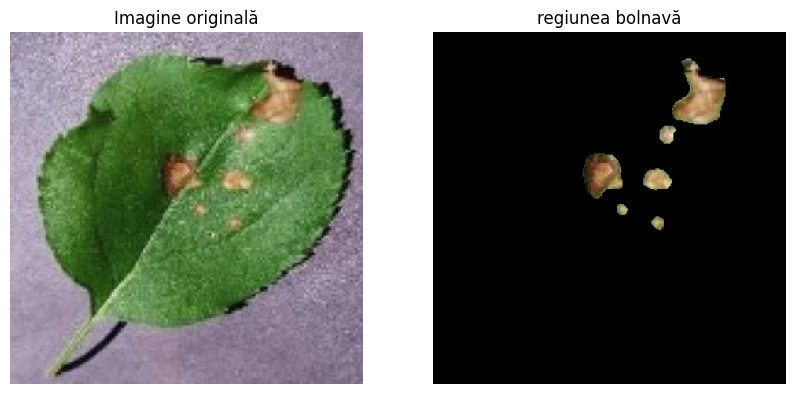

In [18]:

hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)
lower_bound = np.array([10, 50, 0])
upper_bound = np.array([30, 255, 255])
mask = cv2.inRange(hsv, lower_bound, upper_bound)

blurred = cv2.GaussianBlur(mask, (5, 5), 0)
_, thresholded = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)

#Identifică regiunile conectate (componente conectate)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded, connectivity=8)

#Inițializează o mască goală pentru a adăuga regiunile bolnave

disease_mask = np.zeros_like(thresholded)

#Parcurge regiunile și le adaugă la mască

min_area_threshold =30
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    if area > min_area_threshold:
        region_mask = np.where(labels == i, 255, 0).astype(np.uint8)
        disease_mask = cv2.bitwise_or(disease_mask, region_mask)

# Extract diseased region
disease_region = cv2.bitwise_and(image_rgb, image_rgb, mask=disease_mask)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imagine originală')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(disease_region, cv2.COLOR_BGR2RGB))
plt.title('regiunea bolnavă')
plt.axis('off')
plt.show()

## Fundal

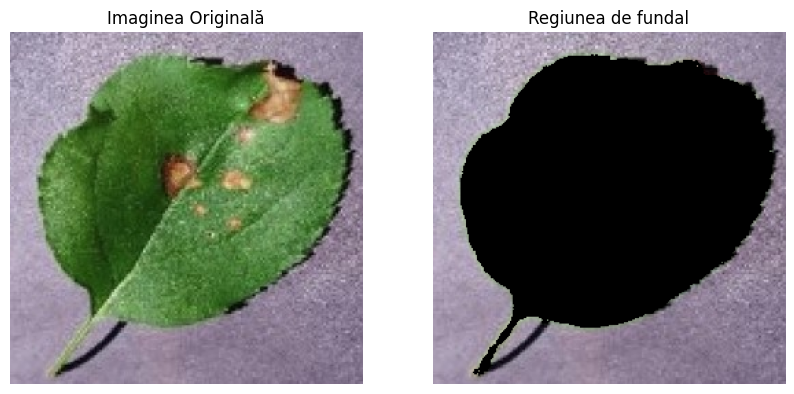

In [19]:
hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)
lower_bound = np.array([0, 40, 0])
upper_bound = np.array([70, 255, 255])
mask = cv2.inRange(hsv, lower_bound, upper_bound)

#Identifică regiunile conectate (componente conectate)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

#creaza o masca goala
healthy_mask = np.zeros_like(mask)

#Parcurge regiunile și le adaugă la mască

for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    if area > 1000:
        region_mask = np.where(labels == i, 255, 0).astype(np.uint8)
        healthy_mask = cv2.bitwise_or(healthy_mask, region_mask)

# Evidențiem zona bolnavă prin negarea măștii sănătoase
disease_mask = cv2.bitwise_not(healthy_mask)

result = cv2.bitwise_and(image_rgb, image_rgb, mask=disease_mask)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imaginea Originală')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Regiunea de fundal')
plt.axis('off')
plt.show()


Afisarea imaginilor modificate în spațiul HSV

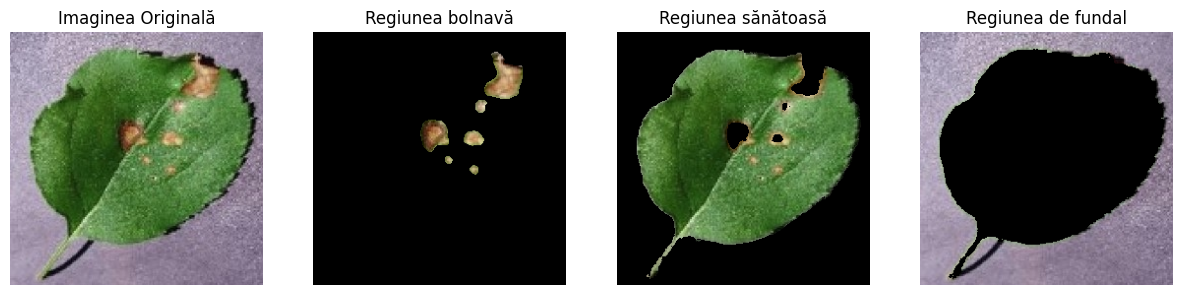

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imaginea Originală')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(disease_region, cv2.COLOR_BGR2RGB))
plt.title('Regiunea bolnavă')
plt.axis('off')

plt.subplot(1, 4 , 3)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('Regiunea sănătoasă')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Regiunea de fundal')
plt.axis('off')
plt.show()

## SCATTER

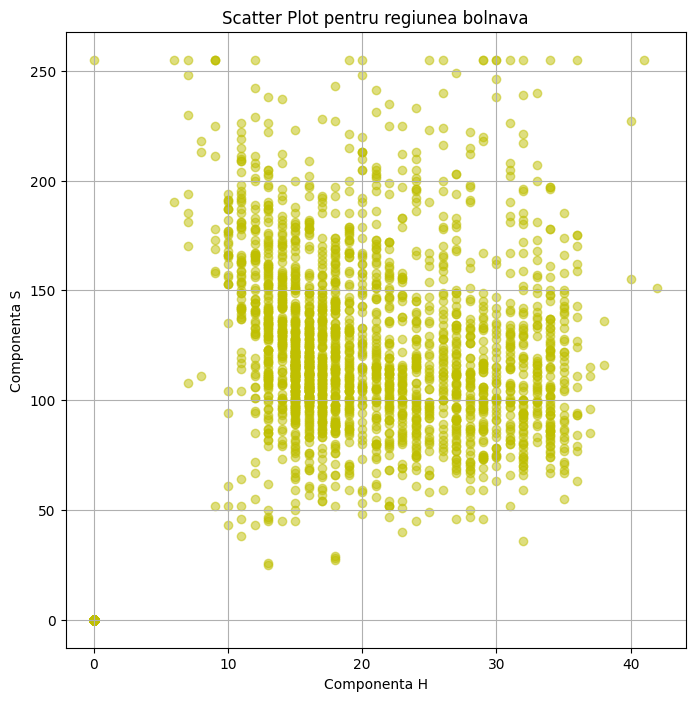

In [21]:
# Converteste imaginea in spatiul de culoare HSV
lab_image_disease = cv2.cvtColor(disease_region, cv2.COLOR_BGR2HSV)

# Extrage valorile pentru H și S
h_values3 = lab_image_disease[:, :, 0].ravel()  # Componenta H
s_values3 = lab_image_disease[:, :, 1].ravel()  # Componenta S

# Crearea scatter plot-ului
plt.figure(figsize=(8, 8))
plt.scatter( h_values3, s_values3, c='y', marker='o', alpha=0.5)
plt.title('Scatter Plot pentru regiunea bolnava')
plt.xlabel('Componenta H')
plt.ylabel('Componenta S')
plt.grid(True)
plt.show()

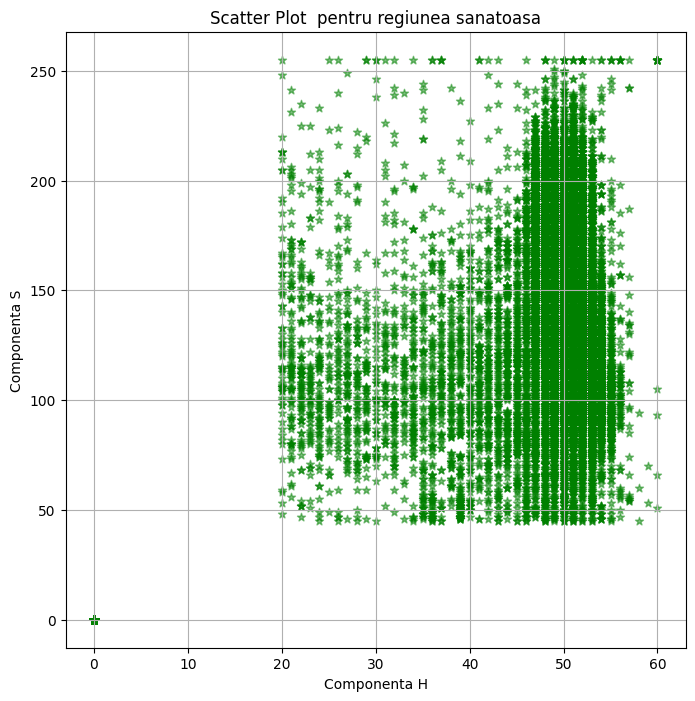

In [22]:
# Converteste imaginea in spatiul de culoare HSV
lab_image_result = cv2.cvtColor(result2, cv2.COLOR_BGR2HSV)

# Extrage valorile pentru H și S

h_values4 = lab_image_result[:, :, 0].ravel()  # Componenta H
s_values4 = lab_image_result[:, :, 1].ravel()  # Componenta S

# Crearea scatter plot-ului
plt.figure(figsize=(8, 8))

plt.scatter( h_values4, s_values4, c='g', marker='*', alpha=0.5)
plt.title('Scatter Plot  pentru regiunea sanatoasa')
plt.xlabel('Componenta H')
plt.ylabel('Componenta S')
plt.grid(True)
plt.show()

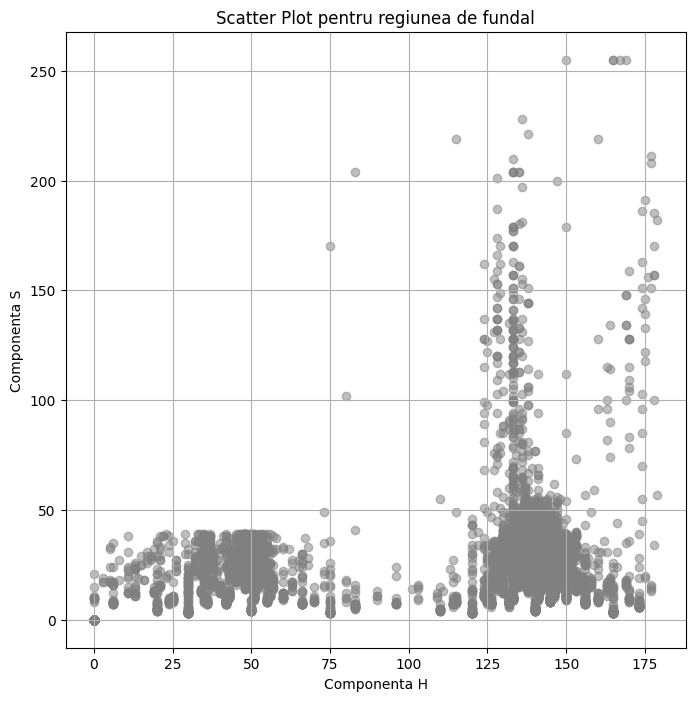

In [23]:
# Converteste imaginea in spatiul de culoare HSV
lab_image_result1 = cv2.cvtColor(result, cv2.COLOR_BGR2HSV)

# Extrage valorile pentru H și S

h_values5 = lab_image_result1[:, :, 0].ravel()  # Componenta H
s_values5 = lab_image_result1[:, :, 1].ravel()  # Componenta S

# Crearea scatter plot-ului
plt.figure(figsize=(8, 8))
plt.scatter(h_values5, s_values5, c='gray', marker='o', alpha=0.5)
plt.title('Scatter Plot pentru regiunea de fundal')
plt.xlabel('Componenta H')
plt.ylabel('Componenta S')
plt.grid(True)
plt.show()

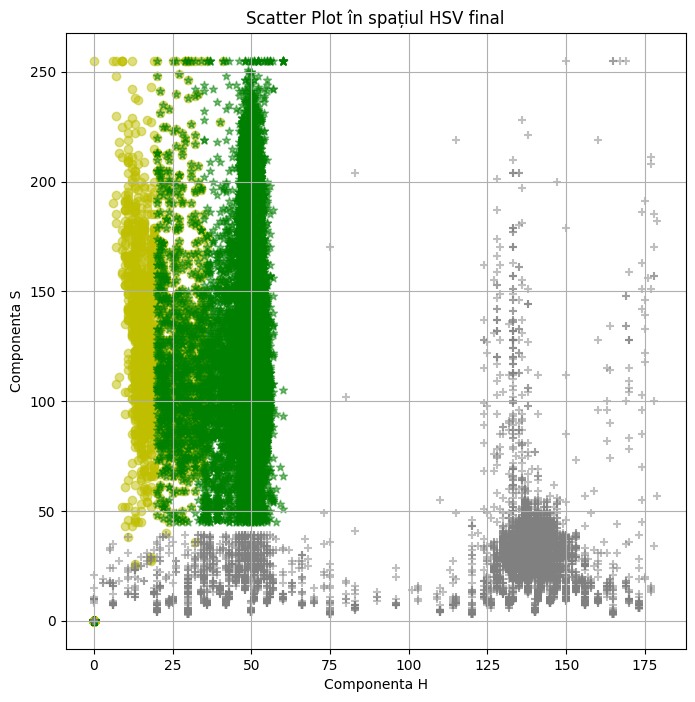

In [24]:

# Crearea scatter plot-ului
plt.figure(figsize=(8, 8))
plt.scatter(h_values3, s_values3, c='y', marker='o', alpha=0.5)
plt.scatter(h_values4, s_values4, c='g', marker='*', alpha=0.5)
plt.scatter(h_values5, s_values5, c='gray', marker='+', alpha=0.5)
plt.title('Scatter Plot în spațiul HSV final')
plt.xlabel('Componenta H')
plt.ylabel('Componenta S')
plt.grid(True)
plt.show()

Afisare rezultate finale din spatiul HSV


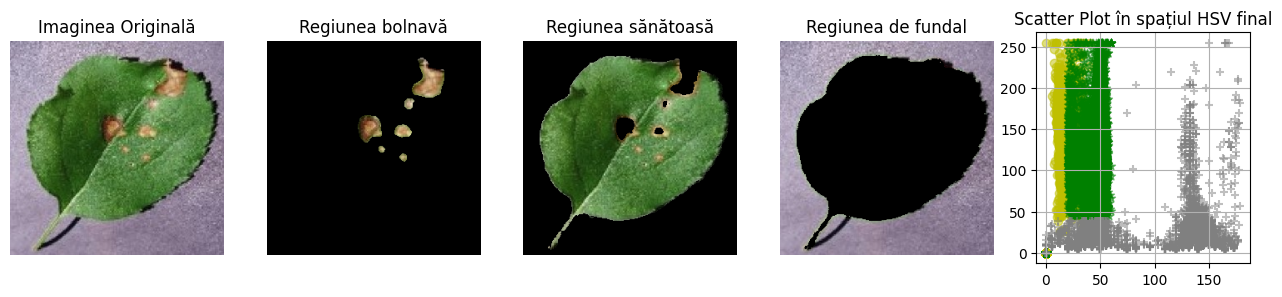

In [25]:
plt.figure(figsize=(16, 3))
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imaginea Originală')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(disease_region, cv2.COLOR_BGR2RGB))
plt.title('Regiunea bolnavă')
plt.axis('off')

plt.subplot(1, 5 , 3)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('Regiunea sănătoasă')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Regiunea de fundal')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.scatter(h_values3, s_values3, c='y', marker='o', alpha=0.5)
plt.scatter(h_values4, s_values4, c='g', marker='*', alpha=0.5)
plt.scatter(h_values5, s_values5, c='gray', marker='+', alpha=0.5)
plt.title('Scatter Plot în spațiul HSV final')
plt.grid(True)
plt.show()